<h1 style="text-align:center">Travail pratique numérique en thermodynamique statistique</h1>
<h2 style="text-align:center">PARTIE 1 : Cinétique des gaz parfaits</h2>

Veuillez indiquer le nom des membres de votre équipe dans la cellule suivante.

<h1><center>Physique numérique (PHY-3500) - TP1</center></h1>
<hr>
<br><br>

**Membres de l'équipe**
| Nom | NI |
| --- | :---: |
| Maxime Tousignant-Tremblay | 536 772 369 |
| Philippe Morin | 536 776 382 |
| Alyx Olivier| 536 772 782 |
| Anna-Kim Péron| 536 852 157 |

# Atelier en classe : 31 janvier 2024 #
### Discussion interdisciplinaire de sujets en probablilité & statistiques ###

**Quelques fondements de mathématiques statistiques:** par exemple bien définir variables aléatoires, échantillon et population totale, estimateurs, fonction de distribution cumulative (répartition), densité de probabilité, moments, etc. - **Programme GPH**

**Les distributions statistiques de particules indiscernables:** en particulier celle de Fermi-Dirac avec les notions de potentiel chimique et d’occupation des états en fonction de la température, en analogie avec le remplissage selon le principe principe d’Aufbau introduit en classe pour les atomes à température nulle. - **Programme PHY**

**_Un point de bonus sera accordé à tous les étudiantes et étudiants qui participeront à l'atelier pour discuter des sujets ci-dessus et débuter le travail de la première partie ci-dessous._**

# Introduction #
Ce travail révise d'abord quelques bases générales de mécanique statistique classique avec le script `TDS-2Dsimulation_HXX.py` qui simule la théorie cinétique des gaz parfaits en 2D. Cette simulation utilise le concept de sphères dures, mais ici pour le cas des particules d'un gaz afin d'introduire des collisions élastiques entre elles sur leurs trajectoires ballistiques. Notez qu'une sphère est colorée et grossie seulement pour l’effet visuel dans l'animation, la physique de l’algorithme codé considère bien des particules totalement identiques. Les questions sur cette simulation, à répondre directement dans les cellules du carnet _(Notebook)_ ici-même, explorent quelques paramètres de la thermodynamique statistique et introduisent de nouveaux termes utiles à l'étude de la dynamique des électrons dans la matière.

_N.B._ 
- _Pour montrer les animations à l'écran, le script `TDS-2Dsimulation_HXX.py` importe la librairie `VPython` qu'il faut donc installer. Des liens vers sa documentation et de l'information complémentaire sont donnés dans la médiagraphie à la fin._
- _Le code dans ce script est abusivement commenté dans notre contexte pédagogique, mais il serait bien sûr préférable de s’en tenir aux recommandations du <a href="https://www.python.org/dev/peps/pep-0008"> PEP 8 — Style Guide for Python Code</a>._
- _Notez finalement que la boucle principale à la fin du script laisse l'utilisateur voir l'animation aussi longtemps que souhaité, assurez-vous donc de savoir comment l'interrompre correctement avant de lancer la simulation ou de la remplacer par une boucle `for`._

# Cinétique CLASSIQUE des gaz parfaits #

### Simulation 2D ###

In [1]:
import numpy as np
import vpython as vp
from scipy import constants as cte


<IPython.core.display.Javascript object>

In [2]:
# codes recquis pour faire rouler la simulation (TDS_2Dsimulation_H24.py et Particules.py)
%run TDS_2Dsimulation_H24.py 1000

#(pour faire rouler la simulation sans vpython,)
#import TDS_H24_novpython as tds

#hs = tds.HardSphere()
# hs.p # get momentum
# hs.p2  # get p^2
# hs.vel # get particles velocity
#hs.run() # run simulation

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Questions statistiques ###

**I.** _(3 points)_  &mdash; Utilisez la liste finale des vecteurs de quantité de mouvement $\vec{p}$ de toutes les sphères pour trouver la moyenne de son carré $\langle p^2\rangle=\langle\vec{p}\cdot\vec{p}\rangle$ et l'imprimer avec la fonction `print()` dans la cellule qui suit. 

In [3]:
# p à la fin de la simulation
psquare_mean = np.mean([vp.mag2(atome.p) for atome in atoms])
print(psquare_mean)

5.504363703526123e-47



**II.** _(2 points)_  &mdash; La température $T$ (macroscopique) est proportionnelle à l'énergie cinétique moyenne $E_{cin}$ de l'ensemble des particules lorsque ce système est rendu à l'équilibre. Celle-ci peut se calculer classiquement selon son <a href="https://fr.wikipedia.org/wiki/%C3%89quipartition_de_l%27%C3%A9nergie">principe d'équipartition</a>, _i.e._ répartissant l'énergie également sur chaque degré de liberté ici en translation seulement, d'où au total pour $i=1,2\text{ ou } 3$ dimensions d'espace réel
\begin{equation}
E_{cin}=\frac{\langle p^2 \rangle}{2m}=i\times\frac{1}{2}k_BT
\end{equation}
avec $k_B$, la constante de Boltzmann et $m$, la masse de chaque particule. Quelle est la température du gaz de sphères dures à la fin de la simulation? Est-ce qu'elle a changé significativement par rapport à sa valeur initiale?

In [4]:
def calculate_temperature(p2, m): #calcul la temperature en K en fonction de E_cin (p2 = <p^2>)
    i = 2 #degré de liberté 2D en simulation
    kB = cte.k #constante de Boltzman
    T = p2/(kB*m*i)
    return T


mass: float = cte.value("alpha particle mass")
TEnd = calculate_temperature(psquare_mean, mass)
print(TEnd, TEnd-300)

300.00000000000006 5.684341886080802e-14


On voit que la température n'a essentiellement pas changée, ce qui est logique, puisque l'énergie est directement proportionnelle à la température et que c'est un système fermé, impliquant une conservation de l'énergie.

**III.** _(10 points)_ &mdash; Modifiez le code de la simulation pour ajouter une fonction qui suit la trajectoire d'UNE SEULE particule, c'est-à-dire qu'elle doit enregistrer, dans une liste, des valeurs de variables pour cette particule et ce, à chacune de ses collisions avec une autre particule (_i.e._ excluez les collisions avec les parois de la boîte). Les deux variables scalaires à lister sont:
- la distance que la particule a parcouru entre chaque collision,
- le temps écoulé entre ces collisions.

Copiez le code de votre fonction dans la cellule qui suit en y commentant clairement les variables pour ces listes qui devront persister après avoir interrompu l'exécution de la simulation. N'oubliez pas d'inclure votre fichier Python (`.py`) modifié avec la simulation complète lors de la remise.

In [5]:
#Code repris du script TDS_2Dsimulation_H24.py, car génère par défaut les objets nécessaires
"""
# Met à jour la liste des variables à suivre
# Unpack les paires de collisions
collisions: list[int] = []
[collisions.extend(paire) for paire in hitlist]

# Calcule le déplacement de analyseSphere et met à jour
# lastPos pour l'utiliser à la prochaine itération
deplacementVec: vp.vector = atoms[analyseSphere].pos - lastPos
deplacementScalaire: float = vp.mag(deplacementVec)
lastPos = atoms[analyseSphere].pos

# Ajoute le temps écoulé et la distance parcourue pendant le temps dt
# au total depuis la dernière collision
dVec[-1] += deplacementVec
dScalaire[-1] += deplacementScalaire
tCollision[-1] += dt

# Si la sphère est impliquée dans une collision, passer à la prochaine
# valeur de temps et de distance entre collisions
if analyseSphere in collisions:
    dVec.append(vp.vector(0, 0, 0))
    dScalaire.append(0)
    tCollision.append(0)
"""
dOutput = [f"{float(elem):.5}" for elem in dScalaire]
tOutput = [f"{float(elem):.5}" for elem in tCollision]
print(f"Distance et temps parcourrue par l'atome {analyseSphere}. \n\nDistances: {dOutput}.\n\nTemps: {tOutput}")


Distance et temps parcourrue par l'atome 106. 

Distances: ['0.13689', '0.21552', '0.063735', '0.012718', '0.021825', '0.0064574', '0.3774', '0.16825', '0.04221', '0.011033', '0.18806', '0.067422', '0.015034', '0.10014', '0.22387', '0.021999', '0.030067', '0.048909', '0.015516', '0.029815', '0.01632', '0.030125', '0.031515', '0.16143', '0.16843', '0.13523', '0.017774', '0.012435', '0.018209', '0.022332', '0.096355', '0.011921', '0.073908', '0.095578', '0.024347', '0.090298', '0.090554', '0.082647', '0.036228', '0.11289', '0.17147', '0.062286', '0.0082824', '0.032265', '0.040024', '0.014705', '0.38457', '0.07043', '0.082378', '0.024212', '0.07179', '0.56975', '0.60252', '0.075921', '0.059247', '0.046872', '0.14612', '0.1059', '0.0098263', '0.015532', '0.017639', '0.14876', '0.031638', '0.25126', '0.010832', '0.085368', '0.10235', '0.13275', '0.015034', '0.15602', '0.059982', '0.20452', '0.18205', '0.022704', '0.0088463', '0.024406', '0.24562', '0.38142', '0.01903', '0.027481', '0.11412'

**IV.** _(2 points)_ &mdash; Calculez le **libre parcours moyen** $l_{moy}$ et le **temps de collision** $\tau$ qui sont les valeurs moyennes des deux listes compilées au numéro précédent.

_(Pour votre information, le libre parcours moyen est de l’ordre de 100 nm dans l'air à température et pression ambiantes, mais_ $l_{moy}$ _peut dépasser 100 000 km dans une enceinte sous vide avec les technologies de pompes modernes!)_



In [6]:
lmoy = deepcopy(np.mean(dScalaire)) #m
tau = deepcopy(np.mean(tCollision)) #s
print(f"{lmoy:.5}, {tau:.5}")

0.095062, 0.00011111


**V.** _(2 points)_ Calculez la vitesse $\vec{v}$ de la particule entre chaque paire de collisions. Quelle est la vitesse moyenne $\langle\vec{v}\rangle$ de la particule?

In [7]:
vVec = [d/t for d, t in zip(dVec, tCollision)]
vMoy = sum(dVec, vp.vector(0, 0, 0)) / (dt*timeLoopLen)

print(vVec)
print(f"<v> = {vMoy}")
print(f"sqrt(<v^2>) = {lmoy/tau}")

[<170.227, 1120.91, 0>, <702.744, 1251.59, 0>, <6.25269, -397.631, 0>, <-1013.4, -768.384, 0>, <1442.41, 1637.97, 0>, <209.961, -9.60314, 0>, <1113.93, -584.473, 0>, <1033.45, -612.879, 0>, <387.246, -358.347, 0>, <175.852, -1089.19, 0>, <-542.126, -510.267, 0>, <802.913, 227.816, 0>, <676.589, -323.473, 0>, <670.278, -230.491, 0>, <345.265, 1257.01, 0>, <84.7524, 313.045, 0>, <-2797.91, 1100.92, 0>, <-731.355, 476.579, 0>, <1349.16, -766.244, 0>, <1324.11, -675.814, 0>, <1372.16, -883.437, 0>, <122.035, -902.395, 0>, <-766.113, -1376.76, 0>, <-93.5358, 330.113, 0>, <122.332, 1166.29, 0>, <-474.291, -287.069, 0>, <-485.947, -338.314, 0>, <-363.051, -421.669, 0>, <706.93, -1678.1, 0>, <-2180.98, 480.15, 0>, <-659.202, -560.891, 0>, <-230.726, 322.903, 0>, <-384.671, 351.244, 0>, <628.29, 502.59, 0>, <229.389, -1195.11, 0>, <35.9692, -1067.63, 0>, <-1088.57, -309.834, 0>, <-474.981, 917.057, 0>, <71.7391, 348.543, 0>, <-141.608, -33.6875, 0>, <-479.441, 363.129, 0>, <-808.725, -938.614, 

**VI.** _(5 points)_ &mdash; Pour cette même liste de vitesses, comparez les distributions de la norme $||\vec{v}||$, du carré $v^2$ et d’une de ses composantes $v_x^2$ en étalonnant l’abscisse pour contraster les histogrammes avec une échelle appropriée. Indiquez sur ce graphique la moyenne, le mode, la médiane et la moyenne quadratique des distributions.

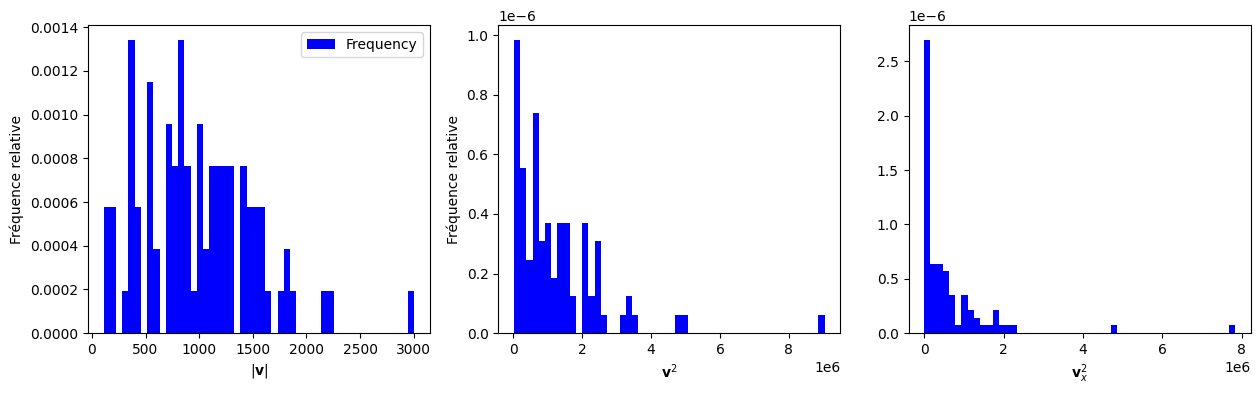

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

vNorm = [vp.mag(v) for v in vVec]
v2Norm = [vp.mag2(v) for v in vVec]
vxNorm = [v.x**2 for v in vVec]

NBINS = 50
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
axs[0].hist(vNorm, NBINS, density=True, color="b", label="Frequency")
axs[1].hist(v2Norm, NBINS, density=True, color="b", label="Frequency")
axs[2].hist(vxNorm, NBINS, density=True, color="b", label="Frequency")
axs[0].set_xlabel(r"$|\mathbf{v}|$")
axs[1].set_xlabel(r"$\mathbf{v}^2$")
axs[2].set_xlabel(r"$\mathbf{v}_x^2$")
[axs[i].set_ylabel("Fréquence relative") for i in range(2)]
#axs[0].set_title("Dataset")
axs[0].legend()

**Bonus.** _(4 points)_ &mdash; Montrez que 
- (a) le théorème central limite est satisfait par une des distributions de vitesse du numéro précédent,
- (b) le système simulé est ergodique.

In [2]:
# (a)
# On roule le conde avec un grand nombre d'itérations pour
# pour avoir une belle gaussienne, N > 100 absolument
%run TDS_2Dsimulation_H24.py 10000
# On élimine le début de la simulation pour laisser
# le temps aux particules de se distribuer selon MB
S_n = S_n[100:]

# On fait la moyenne de |v| pour tous les électrons à chaque
# intervalle de temps et on calcule la moyenne et la variance
# de la distribution résultante
mu = np.mean(S_n)
sigma = np.std(S_n)

# On centre et réduit la distribution
centreReduit = [(S_i-mu)/sigma for S_i in S_n]

# On affiche l'histogramme et on le compare à N(0,1)
x = np.linspace(-10, 10, 1000)
y = lambda x: np.e**(-x**2/2)/np.sqrt(2*np.pi)

plt.hist(centreReduit, NBINS, density=True, label=r"Histogramme de $\langle |\mathbf{v}| \rangle$")
plt.plot(x, y(x), label="Distribution normale centrée réduite")
plt.xlabel(r"$x$")
plt.ylabel("Densité de probabilité")
plt.legend()
plt.xlim(-4, 4)
plt.ylim(0, 0.5)
plt.show()

<IPython.core.display.Javascript object>

KeyboardInterrupt: 

NameError: name 'S_n' is not defined

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 0, "Nombre d'ittérations de la simualtion [s]")

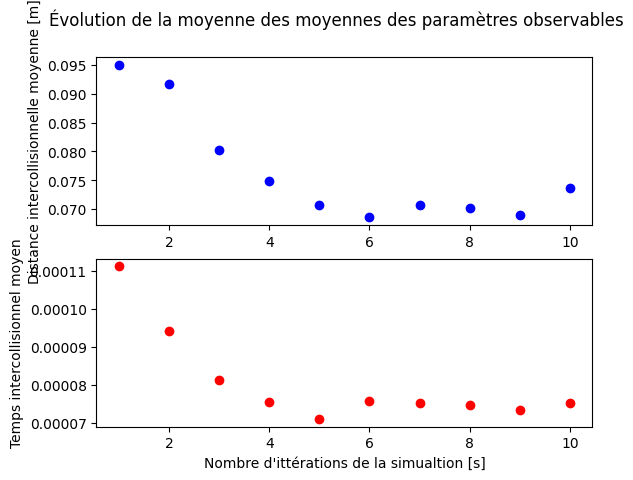

In [9]:
#(b) Pour prouver que le système est ergodique, prouvons que les observables les plus pertinents de
# la simulation, soit la moyenne de temps et de distance entre chaque collision, converge après 
#plusieurs simulations (10) vers la même valeur

%run TDS_2Dsimulation_H24.py 1000
lmoy1 = deepcopy(np.mean(dScalaire)) #m
tau1 = deepcopy(np.mean(tCollision)) #s
%run TDS_2Dsimulation_H24.py 1000
lmoy2 = deepcopy(np.mean(dScalaire)) #m
tau2 = deepcopy(np.mean(tCollision)) #s
%run TDS_2Dsimulation_H24.py 1000
lmoy3 = deepcopy(np.mean(dScalaire)) #m
tau3 = deepcopy(np.mean(tCollision)) #s
%run TDS_2Dsimulation_H24.py 1000
lmoy4 = deepcopy(np.mean(dScalaire)) #m
tau4 = deepcopy(np.mean(tCollision)) #s
%run TDS_2Dsimulation_H24.py 1000
lmoy5 = deepcopy(np.mean(dScalaire)) #m
tau5 = deepcopy(np.mean(tCollision)) #s
%run TDS_2Dsimulation_H24.py 1000
lmoy6 = deepcopy(np.mean(dScalaire)) #m
tau6 = deepcopy(np.mean(tCollision)) #s
%run TDS_2Dsimulation_H24.py 1000
lmoy7 = deepcopy(np.mean(dScalaire)) #m
tau7 = deepcopy(np.mean(tCollision)) #s
%run TDS_2Dsimulation_H24.py 1000
lmoy8 = deepcopy(np.mean(dScalaire)) #m
tau8 = deepcopy(np.mean(tCollision)) #s
%run TDS_2Dsimulation_H24.py 1000
lmoy9 = deepcopy(np.mean(dScalaire)) #m
tau9 = deepcopy(np.mean(tCollision)) #s
%run TDS_2Dsimulation_H24.py 1000

lMoyVec = [lmoy, lmoy1, lmoy2, lmoy3, lmoy4, lmoy5, lmoy6, lmoy7, lmoy8, lmoy9]
tauVec = [tau, tau1, tau2, tau3, tau4, tau5, tau6, tau7, tau8, tau9]

lMoyErgo, tauMoyErgo = np.zeros(10), np.zeros(10)
for step in range(10): 
    lMoyErgo[step] = np.mean(lMoyVec[0:step+1])
    tauMoyErgo[step] = np.mean(tauVec[0:step+1])

fig, axs = plt.subplots(2)
fig.suptitle('Évolution de la moyenne des moyennes des paramètres observables')
axs[0].plot(range(1, 11), lMoyErgo, 'bo')
axs[0].set_ylabel("Distance intercollisionnelle moyenne [m]")

axs[1].plot(range(1, 11), tauMoyErgo, 'ro')
axs[1].set_ylabel("Temps intercollisionnel moyen")
axs[1].set_xlabel("Nombre d'ittérations de la simualtion [s]")


Tel que suggéré par les graphiques ci-dessus, la valeur de la moyenne tend à se stabiliser vers une valeur constante, ce qui démontre que le système est bel et bien ergodique.

# Médiagraphie #
 - La simulation utilise la librairie <a href="https://vpython.org">VPython</a> conçue pour faciliter la visualisation de physique en 3D, avec les instructions d’installation <a href="https://vpython.org/presentation2018/install.html">ici</a> et la documentation <a href="https://www.glowscript.org/docs/VPythonDocs/index.html">ici</a>. Le code adapte en 2D et commente en détail l’exemple <a href="https://www.glowscript.org/#/user/GlowScriptDemos/folder/Examples/program/HardSphereGas-VPython">HardSphereGas-VPython</a> du site interactif <a href="https://www.glowscript.org">GlowScript</a> pour programmer des animations avec VPython directement en ligne.